# Wuhan Corona Virus Outbreak

- webscraped infected counts from national health commision via wikipedia
- infection counts are fitted to a simple exponential distribution 


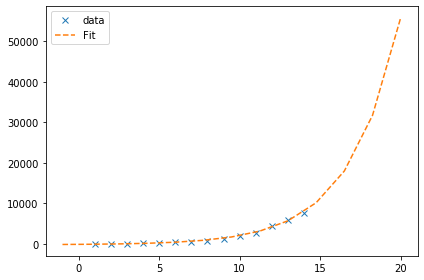

In [22]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Wuhan_coronavirus_outbreak'
page = requests.get(url).text
soup = BeautifulSoup(page,'lxml')
#print(soup.prettify())
My_table = soup.find('div',{'class':'barbox tright'})

datesfinal = []
countsfinal = []

dates = My_table.findAll('td', colspan = '2', style='padding-right:0.4em; padding-left:0.4em')

for date in dates:
    datesfinal.append((pd.to_datetime(date.get_text())))
    
counts = My_table.findAll('td', colspan = '2', style='min-width:3em;padding-left:0.4em; text-align:right')

for count in counts:
    countsfinal.append(int(count.get_text().replace(',','')))  
    
d=list(zip(datesfinal, countsfinal))
df=pd.DataFrame(data=d, columns=['Date','Infected'])    

def exponential_fit(x, a, b, c):
    return a*np.exp(b*x) + c

x = np.linspace(1,len(df),len(df))
y = np.array(df['Infected'])

fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
a, b, c = fitting_parameters

x_min = -1 
x_max = 20 
x_fit = np.linspace(x_min, x_max, 13) 
plt.plot(x, y, 'x', label='data')
plt.plot(x_fit, exponential_fit(x_fit, *fitting_parameters), '--', label='Fit')
plt.tight_layout()
plt.legend()
plt.show()



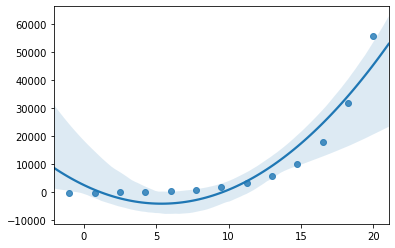

In [17]:
import seaborn as sns

sns.regplot(x=x_fit,y=exponential_fit(x_fit, *fitting_parameters),order=2)



In [25]:
exponential_fit

<function __main__.exponential_fit(x, a, b, c)>

In [27]:
x,y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 array([  45,   62,  121,  198,  291,  440,  571,  830, 1287, 1975, 2744,
        4515, 5974, 7711], dtype=int64))

In [28]:
curve_fit(exponential_fit, x, y)

(array([  90.38985879,    0.32142167, -178.90818136]),
 array([[ 5.34061080e+02, -4.19831807e-01, -2.24098069e+03],
        [-4.19831807e-01,  3.32569361e-04,  1.70062255e+00],
        [-2.24098069e+03,  1.70062255e+00,  1.36620364e+04]]))